# IMPORTING PACKAGES 📦📦

In [837]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy import stats 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score
import random
random.seed(42)

# DATA OVERVIEWS 🧐📊

In [838]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
sample_submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [839]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [840]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [841]:
sample_submission.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [842]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [843]:
column_names = train_df.columns
column_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [844]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [845]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [846]:
concatenated_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
concatenated_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [847]:
y_train = train_df["Survived"]
y_train.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [848]:
# Calculate the number of missing values in each column of the 'train_df' DataFrame
missing_values = concatenated_df.isna().sum()

# Filter columns where the count of missing values is greater than 0
# This creates a boolean mask where 'True' indicates columns with missing values
missing_values_greater_than_zero = missing_values[missing_values > 0]

# Print or use the resulting Series to see columns with missing values and their respective counts
print(missing_values_greater_than_zero)

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [849]:
# List of features to be dropped
features_to_drop = ["PassengerId"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# ANALYZING AND TRANSFORMING THE DATA 🔄🔍

In [850]:
custom_colors = ['#FF5733', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', 
                 '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', '#00D2D3', '#FF5733', 
                 '#900C3F', '#581845', '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', 
                 '#00D2D3', '#FF5733']

# Analyzing Passenger Names 🧐👩‍✈️✨

In [851]:
# Extract titles from the 'Name' column and create a new column 'surname'
concatenated_df['surname'] = concatenated_df['Name'].str.extract(r',\s*([^\.]+)\s*\.', expand=False)

In [852]:
# Mapping for specific titles
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master'
}

# Create the new column 'new_surname' based on the mapping
concatenated_df['new_surname'] = concatenated_df['surname'].map(title_mapping).fillna('Others')

In [853]:
# List of features to be dropped
features_to_drop = ["Name","surname"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_surname
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [854]:
# Calculate average age for each new_surname group
average_age_by_surname = concatenated_df.groupby('new_surname')['Age'].mean().round().astype(int)

# Fill missing age values with average age based on new_surname
concatenated_df['new_Age'] = concatenated_df.apply(lambda row: average_age_by_surname[row['new_surname']] 
                                                if pd.isnull(row['Age']) 
                                                else row['Age'], axis=1)

In [855]:
# List of features to be dropped
features_to_drop = ["Age" , "new_surname"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_Age
0,0.0,3,male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1.0,1,female,1,0,PC 17599,71.2833,C85,C,38.0


# Embarked Port Analysis 🌍🚢

In [856]:
# Calculate the overall average fare
average_fare = concatenated_df['Fare'].mean()

# Fill null 'Fare' values with the overall average fare
concatenated_df['Fare'] = concatenated_df['Fare'].fillna(average_fare/5)

In [857]:
# Group by 'Embarked' and calculate frequency and mean of 'Fare'
embarked_stats = concatenated_df.groupby('Embarked').agg({'Embarked': 'count', 'Fare': 'mean'}).rename(columns={'Embarked': 'Frequency', 'Fare': 'Mean Fare'})

# Print the frequency and mean fare for each 'Embarked' value
print(embarked_stats)

          Frequency  Mean Fare
Embarked                      
C               270  62.336267
Q               123  12.409012
S               914  27.396111


In [858]:
# Find rows where 'Fare' column is null
rows_with_null_fare = concatenated_df[concatenated_df['Embarked'].isnull()]

# Print the rows with null 'Fare'
print(rows_with_null_fare)

     Survived  Pclass     Sex  SibSp  Parch  Ticket  Fare Cabin Embarked  \
61        1.0       1  female      0      0  113572  80.0   B28      NaN   
829       1.0       1  female      0      0  113572  80.0   B28      NaN   

     new_Age  
61      38.0  
829     62.0  


In [859]:
# Fill null values in 'Embarked' column with 'C'
concatenated_df['Embarked'] = concatenated_df['Embarked'].fillna('C')

# Dropping Ticket Column ❌🎫

In [860]:
concatenated_df.drop('Ticket', axis=1, inplace=True)
concatenated_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,new_Age
0,0.0,3,male,1,0,7.2500,NaN,S,22.0
1,1.0,1,female,1,0,71.2833,C85,C,38.0


# Processing Cabin Data 🏠🏠

In [861]:
# Create a new feature indicating whether Cabin information is missing or not
concatenated_df['Cabin_Missing'] = concatenated_df['Cabin'].isnull().astype(int)

# Extract the first letter of the Cabin as a new feature (if available), replace NaN and 'T' with 'Z'
concatenated_df['Cabin_Letter'] = concatenated_df['Cabin'].str[0].apply(lambda x: 'Z' if pd.isnull(x) or x == 'T' else x)

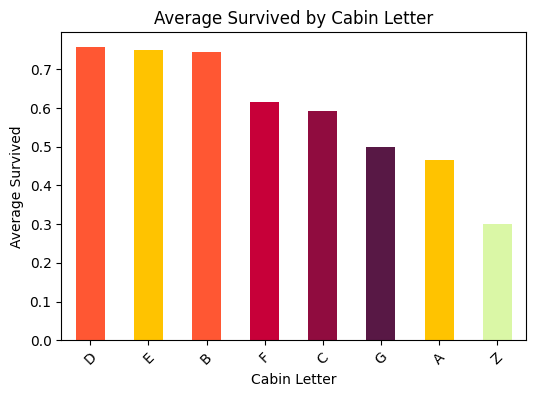

              count      mean       std  min   25%  50%  75%  max
Cabin_Letter                                                     
A              15.0  0.466667  0.516398  0.0  0.00  0.0  1.0  1.0
B              47.0  0.744681  0.440755  0.0  0.50  1.0  1.0  1.0
C              59.0  0.593220  0.495450  0.0  0.00  1.0  1.0  1.0
D              33.0  0.757576  0.435194  0.0  1.00  1.0  1.0  1.0
E              32.0  0.750000  0.439941  0.0  0.75  1.0  1.0  1.0
F              13.0  0.615385  0.506370  0.0  0.00  1.0  1.0  1.0
G               4.0  0.500000  0.577350  0.0  0.00  0.5  1.0  1.0
Z             688.0  0.299419  0.458337  0.0  0.00  0.0  1.0  1.0


In [862]:
# Calculate average SalePrice for each MSZoning category
average_cabin = concatenated_df.groupby('Cabin_Letter')['Survived'].mean().sort_values(ascending=False)

# Bar plot to visualize average SalePrice for each MSZoning category
plt.figure(figsize=(6, 4))
average_cabin.plot(kind='bar', color=custom_colors)
plt.title('Average Survived by Cabin Letter')
plt.xlabel('Cabin Letter')
plt.ylabel('Average Survived')
plt.xticks(rotation=45)
plt.show()

# Summary statistics for SalePrice grouped by MSZoning
summary_stats = concatenated_df.groupby('Cabin_Letter')['Survived'].describe()
print(summary_stats)

In [863]:
# List of features to be dropped
features_to_drop = ["Cabin","Cabin_Missing"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

In [864]:
# concatenated_df["Cabin_Letter"].head(50)
# Create binary columns for each unique letter in the "Cabin_Letter" column
cabin_letter_dummies = pd.get_dummies(concatenated_df["Cabin_Letter"])

# Rename the columns to indicate the presence of specific letters
cabin_letter_dummies.columns = ["Cabin_" + letter for letter in cabin_letter_dummies.columns]

# Concatenate the binary columns with the original DataFrame
concatenated_df = pd.concat([concatenated_df, cabin_letter_dummies], axis=1)

In [865]:
# Drop the original "Cabin_Letter" column
concatenated_df.drop("Cabin_Letter", axis=1, inplace=True)

In [866]:
concatenated_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z
0,0.0,3,male,1,0,7.2500,S,22.0,False,False,False,False,False,False,False,True
1,1.0,1,female,1,0,71.2833,C,38.0,False,False,True,False,False,False,False,False


# Analyzing Pclass 🎫🔢

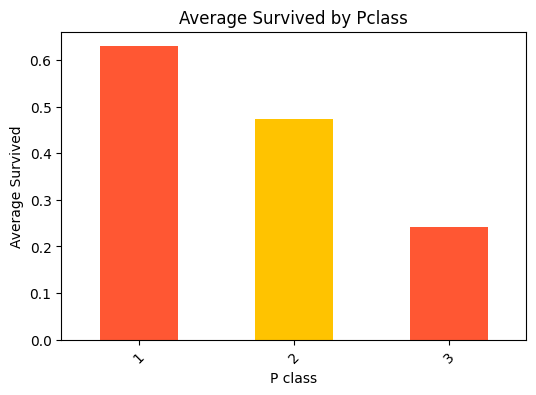

In [867]:
# Calculate average SalePrice for each MSZoning category
average_pClass = concatenated_df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)

# Bar plot to visualize average SalePrice for each MSZoning category
plt.figure(figsize=(6, 4))
average_pClass.plot(kind='bar', color=custom_colors)
plt.title('Average Survived by Pclass')
plt.xlabel('P class')
plt.ylabel('Average Survived')
plt.xticks(rotation=45)
plt.show()

In [868]:
# Create binary columns for each unique class in the "Pclass" column
pclass_dummies = pd.get_dummies(concatenated_df["Pclass"])

# Rename the columns to indicate the presence of specific classes
pclass_dummies.columns = ["PClass_" + str(class_num) for class_num in pclass_dummies.columns]

# Concatenate the binary columns with the original DataFrame
concatenated_df = pd.concat([concatenated_df, pclass_dummies], axis=1)

# Drop the original "Pclass" column
concatenated_df.drop("Pclass", axis=1, inplace=True)

# Print the updated DataFrame
concatenated_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Embarked,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3
0,0.0,male,1,0,7.2500,S,22.0,False,False,False,False,False,False,False,True,False,False,True
1,1.0,female,1,0,71.2833,C,38.0,False,False,True,False,False,False,False,False,True,False,False


# Analyzing Embarked Data 🌍🌍

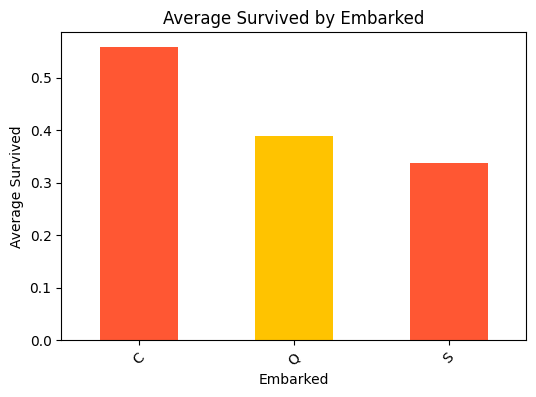

In [869]:
# Calculate average SalePrice for each MSZoning category
average_Embarked = concatenated_df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)

# Bar plot to visualize average SalePrice for each MSZoning category
plt.figure(figsize=(6, 4))
average_Embarked.plot(kind='bar', color=custom_colors)
plt.title('Average Survived by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Average Survived')
plt.xticks(rotation=45)
plt.show()

In [870]:
# Create binary columns for each unique embarkation point in the "Embarked" column
embarked_dummies = pd.get_dummies(concatenated_df["Embarked"])

# Rename the columns to indicate the presence of specific embarkation points
embarked_dummies.columns = ["Embarked_" + embarkation_point for embarkation_point in embarked_dummies.columns]

# Concatenate the binary columns with the original DataFrame
concatenated_df = pd.concat([concatenated_df, embarked_dummies], axis=1)

# Drop the original "Embarked" column
concatenated_df.drop("Embarked", axis=1, inplace=True)

# Print the updated DataFrame
concatenated_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,male,1,0,7.2500,22.0,False,False,False,False,False,False,False,True,False,False,True,False,False,True
1,1.0,female,1,0,71.2833,38.0,False,False,True,False,False,False,False,False,True,False,False,True,False,False


# Data Transformation (LabelEncoder) 🛠️🔤

In [871]:
label_encoder = LabelEncoder()

categorical_columns = concatenated_df.select_dtypes(include=['O']).columns.tolist()

for column in categorical_columns:
    concatenated_df[column] = label_encoder.fit_transform(concatenated_df[column])
    
concatenated_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,1,0,7.2500,22.0,False,False,False,False,False,False,False,True,False,False,True,False,False,True
1,1.0,0,1,0,71.2833,38.0,False,False,True,False,False,False,False,False,True,False,False,True,False,False


# Analyzing Age Data 📊👶👵

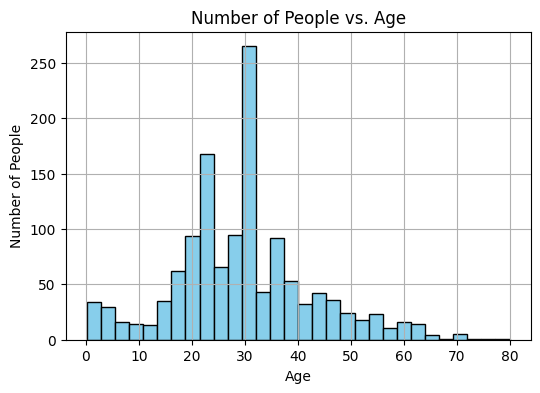

In [872]:
# Plot a histogram of the 'Age' column
plt.figure(figsize=(6, 4))
plt.hist(concatenated_df["new_Age"], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of People vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

In [873]:
# Define bins and labels for age groups
bins = [0, 10, 20, 30, 45, 60, float('inf')]
labels = [0, 1, 2, 3, 2, 1]

# Create a new column 'AgeGroup' based on the 'Age' column
concatenated_df['AgeGroup'] = pd.cut(concatenated_df['new_Age'], bins=bins, labels=labels, right=False,ordered=False)

concatenated_df.drop('new_Age', axis=1, inplace=True)

# Print the DataFrame with the new 'AgeGroup' column
concatenated_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup
0,0.0,1,1,0,7.2500,False,False,False,False,False,False,False,True,False,False,True,False,False,True,2
1,1.0,0,1,0,71.2833,False,False,True,False,False,False,False,False,True,False,False,True,False,False,3


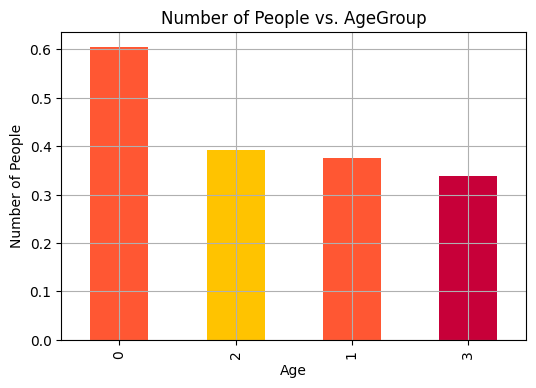

In [874]:
average_AgeGroup = concatenated_df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)
# Plot a histogram of the 'Age' column

plt.figure(figsize=(6, 4))
average_AgeGroup.plot(kind='bar', color=custom_colors)
plt.title('Number of People vs. AgeGroup')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# Family Relationship Transformation 🤝💼

In [875]:
# Convert 'SibSp' and 'Parch' based on specified conditions
concatenated_df['SibSp'] = concatenated_df['SibSp'].apply(lambda x: 0 if x == 0 else 2 if x in [1, 2] else 1)
concatenated_df['Parch'] = concatenated_df['Parch'].apply(lambda x: 0 if x == 0 else 2 if x in [1, 2] else 1)

# Print the updated DataFrame
concatenated_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup
0,0.0,1,2,0,7.2500,False,False,False,False,False,False,False,True,False,False,True,False,False,True,2
1,1.0,0,2,0,71.2833,False,False,True,False,False,False,False,False,True,False,False,True,False,False,3


# Exploring Fare Prices 💸🎫📊

[ 7.25   71.2833  7.925  ...  7.25    8.05   22.3583]


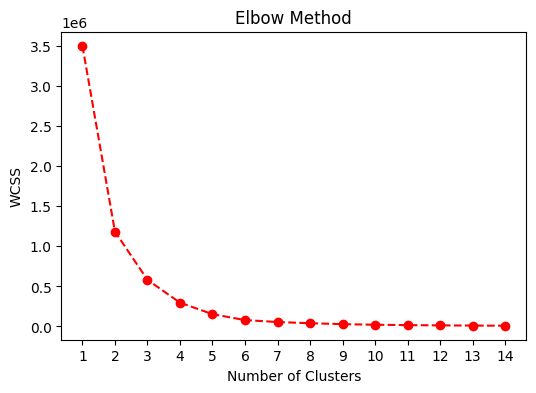

In [876]:
# Convert the fare data to a NumPy array
fare_data = np.array(concatenated_df["Fare"])
print(fare_data)
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fare_data.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--',color="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(np.arange(1, 15, 1))
plt.show()

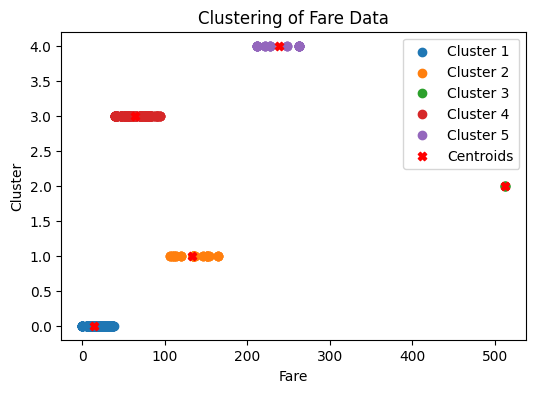

Cluster Labels:
[0 3 0 ... 0 0 0]


In [877]:
# Convert the fare data to a NumPy array
fare_data = np.array(concatenated_df["Fare"])

# Reshape the fare data to be a 2D array
fare_data_reshaped = fare_data.reshape(-1, 1)

# Define the optimal number of clusters (found using the Elbow Method)
optimal_clusters = 5

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(fare_data_reshaped)

# Visualize the clusters and data points
plt.figure(figsize=(6, 4))
for i in range(optimal_clusters):
    plt.scatter(fare_data_reshaped[cluster_labels == i], [i] * len(fare_data_reshaped[cluster_labels == i]), label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_, np.arange(optimal_clusters), color='red', marker='X', label='Centroids')
plt.xlabel('Fare')
plt.ylabel('Cluster')
plt.title('Clustering of Fare Data')
plt.legend()
plt.show()

# Output the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)

In [878]:
# Assuming you have determined the optimal number of clusters (optimal_clusters) using the Elbow Method
optimal_clusters = 5  # Replace this with the actual optimal number of clusters

# Fare data (assuming you already have this data)
fare_data = np.array(concatenated_df["Fare"])

# Reshape the fare data to be a 2D array
fare_data_reshaped = fare_data.reshape(-1, 1)

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(fare_data_reshaped)

# Add the cluster labels as a new column to the DataFrame
concatenated_df["Fare_Cluster"] = cluster_labels

In [879]:
# List of features to be dropped
features_to_drop = ["Fare"]

# Drop the specified features from the concatenated DataFrame
concatenated_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
concatenated_df.head(2)

,Survived,Sex,SibSp,Parch,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup,Fare_Cluster
0,0.0,1,2,0,False,False,False,False,False,False,False,True,False,False,True,False,False,True,2,0
1,1.0,0,2,0,False,False,True,False,False,False,False,False,True,False,False,True,False,False,3,3


# Bar Charts and Pie for All Columns 📊📈

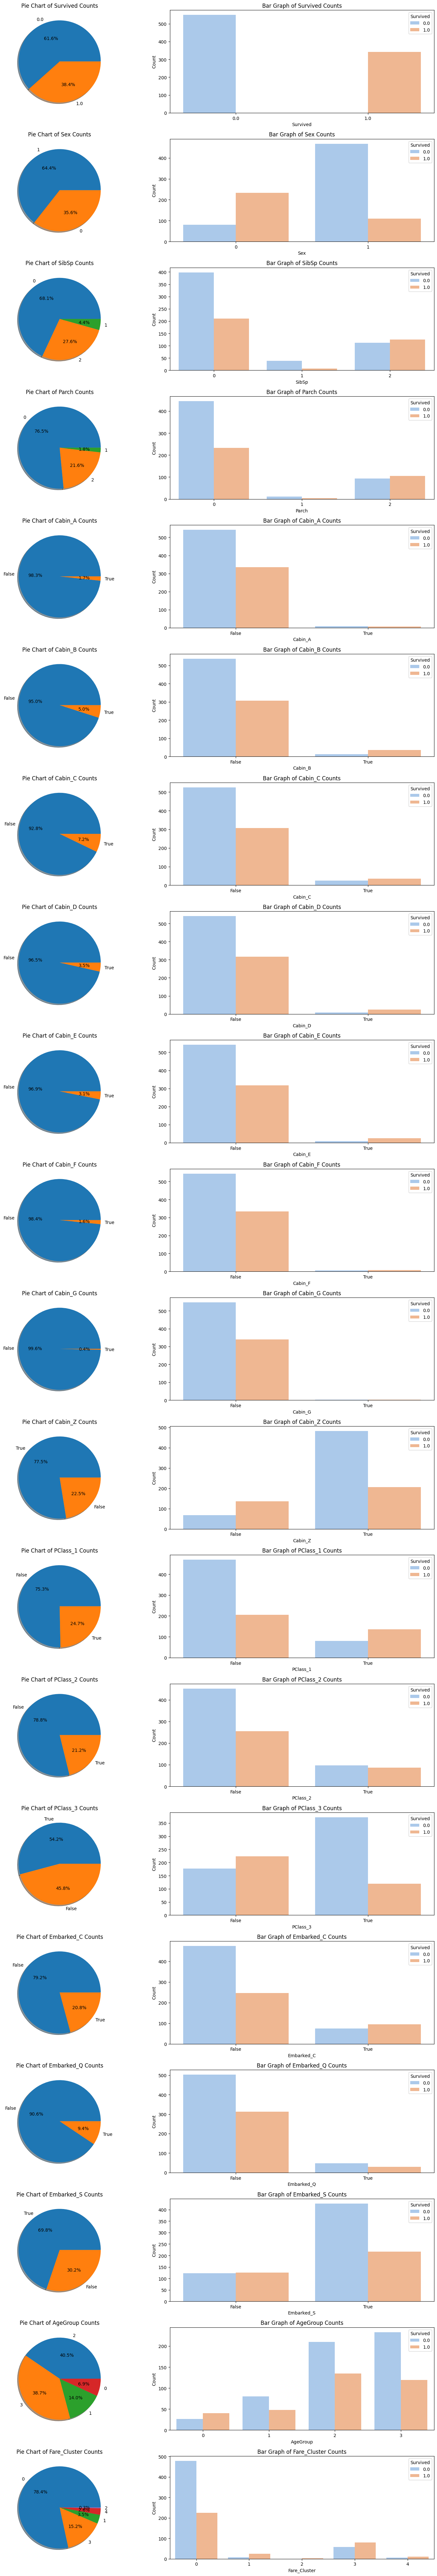

In [880]:
# Assuming univalue_columns is a list of column names containing unique values
columns_list = concatenated_df.columns

# Set up subplots
fig, axs = plt.subplots(len(columns_list), 2, figsize=(16, 4 * len(columns_list)))

for i, column in enumerate(columns_list):
    count_labels = concatenated_df[column].value_counts()

    # Plot pie chart
    axs[i, 0].pie(count_labels, labels=count_labels.index, autopct='%.1f%%', shadow=True)
    axs[i, 0].set_title(f'Pie Chart of {column} Counts')

    # Plot countplot
    sns.countplot(data=concatenated_df, x=column, hue='Survived', palette='pastel', ax=axs[i, 1])
    axs[i, 1].set_title(f'Bar Graph of {column} Counts')
    axs[i, 1].set_ylabel('Count')  # Assuming you want a y-label for the countplot

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [881]:
concatenated_df.drop('Survived', axis=1, inplace=True)
concatenated_df.head(2)

,Sex,SibSp,Parch,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,Embarked_C,Embarked_Q,Embarked_S,AgeGroup,Fare_Cluster
0,1,2,0,False,False,False,False,False,False,False,True,False,False,True,False,False,True,2,0
1,0,2,0,False,False,True,False,False,False,False,False,True,False,False,True,False,False,3,3


# REGRESSION MODELS 🤖📉

In [882]:
# Get the index where the train and test data were originally separated
train_data_index = len(train_df)
test_data_index = len(concatenated_df) - len(test_df)

# Split the concatenated data back into train and test sets
X_train = concatenated_df[:train_data_index]
X_test = concatenated_df[test_data_index:]

In [883]:
# Initialize the models
LogisticRegression_reg = LogisticRegression()
svc_reg = SVC()
KNeighborsClassifier_reg =  KNeighborsClassifier(n_neighbors = 3)
linear_svc = LinearSVC()
decision_tree_reg = DecisionTreeClassifier()
random_forest_reg = RandomForestClassifier(n_estimators=100)

In [884]:
# Train the models
LogisticRegression_reg.fit(X_train, y_train)
svc_reg.fit(X_train, y_train)
KNeighborsClassifier_reg.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestClassifier()

In [885]:
# Make predictions using the trained models
LogisticRegression_reg_preds = LogisticRegression_reg.predict(X_test)
svc_reg_preds = svc_reg.predict(X_test)
KNeighborsClassifier_reg_preds = KNeighborsClassifier_reg.predict(X_test)
linear_svc_reg_preds = linear_svc.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)
random_forest_reg_preds = random_forest_reg.predict(X_test)

In [886]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Logistic Regression': LogisticRegression_reg_preds,
    'Support Vector Machines': svc_reg_preds,
    'KNN': KNeighborsClassifier_reg_preds,
    'Linear SVC': linear_svc_reg_preds,
    'Decision Tree': decision_tree_reg_preds,
    'Random Forest': random_forest_reg_preds
})

In [887]:
# Assuming your DataFrame is named 'predictions_df' Calculate the maximum value in each row
max_values = predictions_df.sum(axis=1)

# Set the answer to 1 if the maximum value in the row is 1, otherwise set it to 0
answers = max_values.apply(lambda x: 1 if x >=4  else 0)

In [888]:
test_ids = sample_submission['PassengerId']

submission_df = pd.DataFrame({'PassengerId': test_ids, 'Survived': answers})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Print the head of the submission DataFrame
print(submission_df.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


# Score: 0.80622 🏆🔢